<a href="https://colab.research.google.com/github/Nandini1230/Statistical-Analysis-Stock/blob/main/Statstical_decription_of_Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

In [ ]:
name = 'GOOG'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2015-03-15",end="2020-09-10")
x = df['Close']

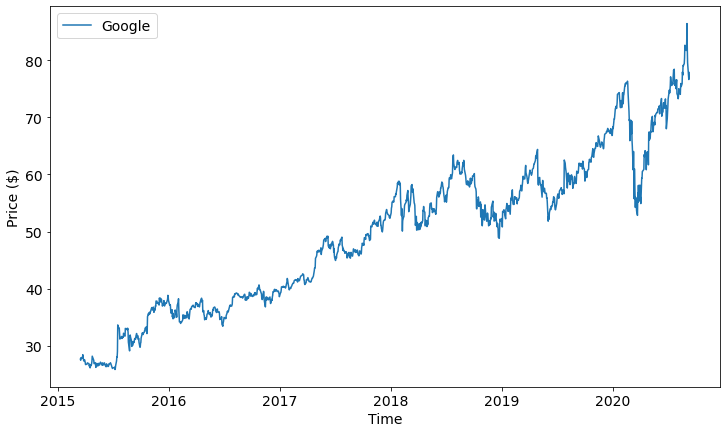

In [ ]:
plt.plot(x,label="Google")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [ ]:
returns = x.pct_change(1).dropna()

In [ ]:
returns[0:10]

Date
2015-03-17 00:00:00-04:00   -0.006618
2015-03-18 00:00:00-04:00    0.015721
2015-03-19 00:00:00-04:00   -0.002699
2015-03-20 00:00:00-04:00    0.004247
2015-03-23 00:00:00-04:00   -0.002766
2015-03-24 00:00:00-04:00    0.020365
2015-03-25 00:00:00-04:00   -0.020002
2015-03-26 00:00:00-04:00   -0.006469
2015-03-27 00:00:00-04:00   -0.012303
2015-03-30 00:00:00-04:00    0.006729
Name: Close, dtype: float64

In [ ]:
(x[1]-x[0])/x[0]

-0.006618426007600398

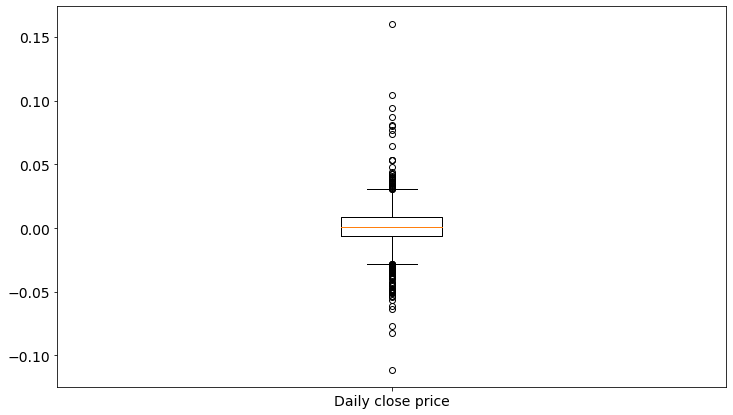

In [ ]:
plt.boxplot(returns,labels=["Daily close price"])


plt.show()

In [ ]:
returns.describe()

count    1382.000000
mean        0.000893
std         0.017015
min        -0.111008
25%        -0.006044
50%         0.000906
75%         0.008677
max         0.160524
Name: Close, dtype: float64

In [ ]:
np.mean(returns)

0.000893203141449625

In [ ]:
np.std(returns)

0.017009342276554856

In [ ]:
np.quantile(returns,0.5)

0.0009057983734317432

In [ ]:
skew(returns)

0.5494373649909662

In [ ]:
skewtest(returns)

SkewtestResult(statistic=7.860103172215555, pvalue=3.838171907757484e-15)

In [ ]:
kurtosis(returns)

11.114327275723149

In [ ]:
kurtosistest(returns)

KurtosistestResult(statistic=16.36196821476275, pvalue=3.573879113074829e-60)

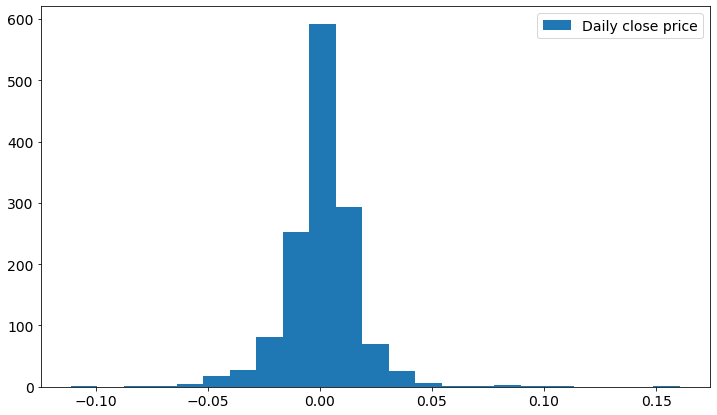

In [ ]:
plt.hist(returns,bins="rice",label="Daily close price")

plt.legend()
plt.show()

In [ ]:
t = np.linspace(0.01,0.99,1000)

q1 = np.quantile(returns,t)

q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))

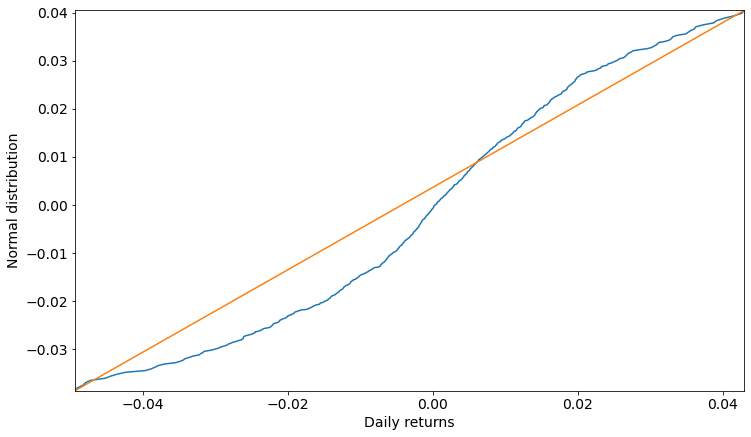

In [ ]:
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])

plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))

plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

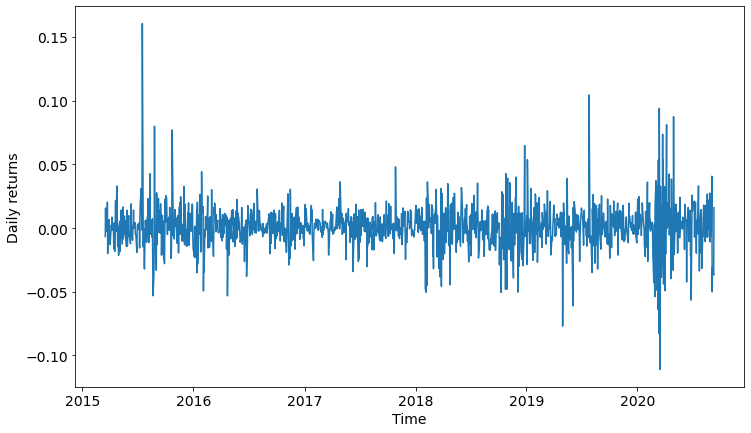

In [ ]:
plt.plot(returns)
plt.xlabel("Time")
plt.ylabel("Daily returns")

plt.show()

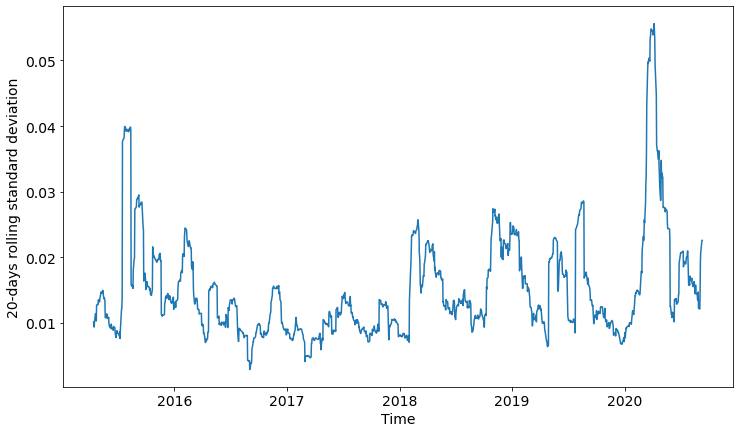

In [ ]:
plt.plot(returns.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()

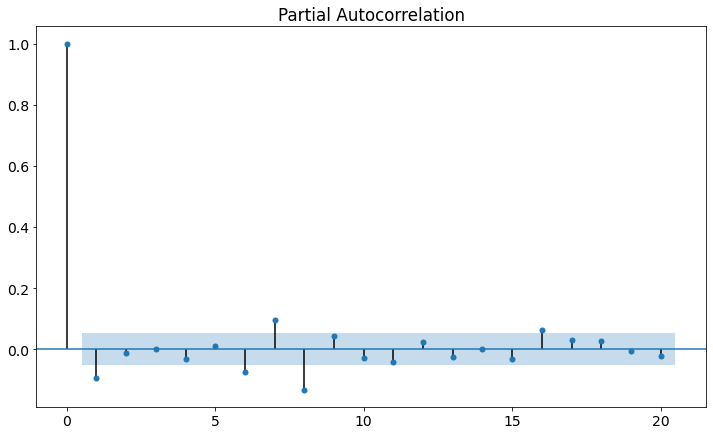

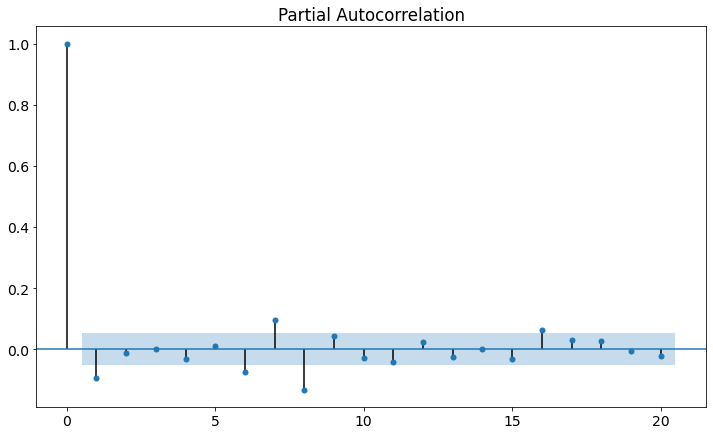

In [ ]:
plot_pacf(returns,lags=20)